In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

(train_ds, val_ds), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=5)

base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(train_ds, validation_data=val_ds, epochs=3)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.9Y7H0B_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 91s 130ms/step - accuracy: 0.5655 - loss: 0.6872 - val_accuracy: 0.6232 - val_loss: 0.6554
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 65s 109ms/step - accuracy: 0.6053 - loss: 0.6625 - val_accuracy: 0.6301 - val_loss: 0.6499
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 65s 109ms/step - accuracy: 0.6208 - loss: 0.6553 - val_accuracy: 0.6090 - val_loss: 0.6522
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 65s 109ms/step - accuracy: 0.6181 - loss: 0.6518 - val_accuracy: 0.6264 - val_loss: 0.6429
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 65s 109ms/step - accuracy: 0.6224 - loss: 0.6462 - val_accuracy: 0.6434 - val_loss: 0.6350
Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 97s 140ms/step - accuracy: 0.6432 - loss: 0.6453 - val_accuracy: 0.7253 - val_loss: 0.5552
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 80s 135ms/step - accuracy: 0.7219 - loss: 0.5583

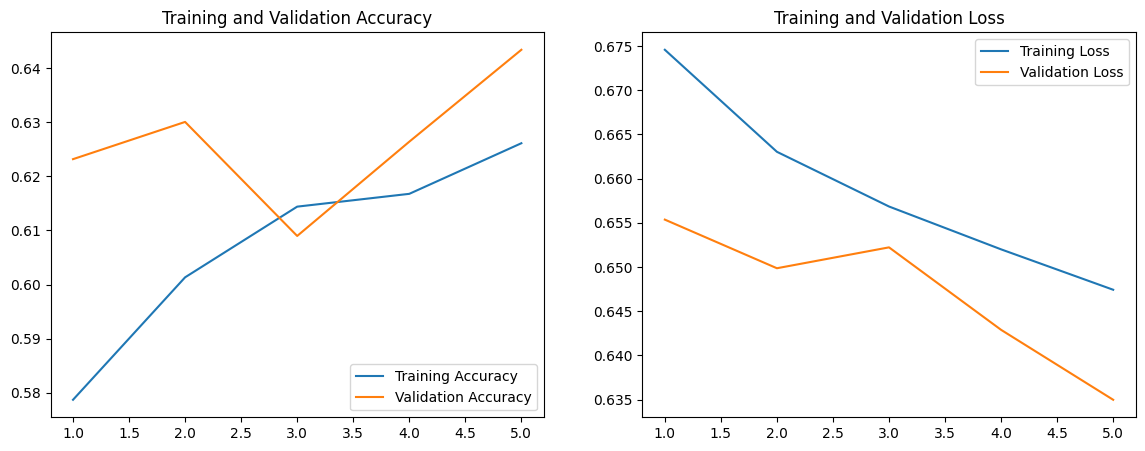

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history1, history2=None):
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']

    if history2:
        acc += history2.history['accuracy']
        val_acc += history2.history['val_accuracy']
        loss += history2.history['loss']
        val_loss += history2.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history, history2=None)